## Classifications problem statement 
Predictiong cancellation can aid a hotel in optimazing room occupancy and revenue. By anticipating which bookings will be cancelled, the hotel can release those rooms for sale to other guests. thus avoiding overbookung and lost revenue. Addictionnally, predicting camcellations can inform staffing and inventory management, allowing the hotel to make more efficient use of ots resources. An accurate cancellation prediction model can help hotels increase revenue and operate more efficiently. This motebook will utilize data visualization to uncover insights from the reservations datasets and the usage of different prediction models (classification models) to predict cancellations.

In [1]:

##Import of different libraries useful in our EDA
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.Booking_ID.value_counts().sum(), df.shape

(36275, (36275, 19))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Exploratory Data Analysis
The describe method in pandas is a useful tool for getting a quick overview of the columns in a DataFrame. It can provide information such as the number of non-missing values, mean, standard deviation, minimum and maximum values for numerical columns, and the mode for categorical columns. This can help identify outliers and unusual values in the data before proceeding with further analysis or modeling.

In [6]:
df.drop(columns='Booking_ID', inplace=True)

In [7]:
df.isna().sum().sum()

0

<AxesSubplot:>

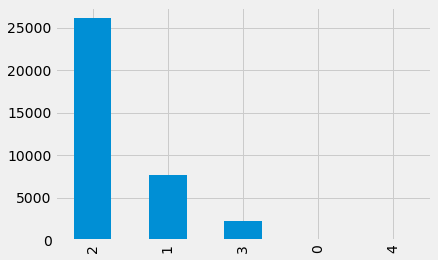

In [8]:
df.no_of_adults.value_counts().plot(kind='bar')

<AxesSubplot:>

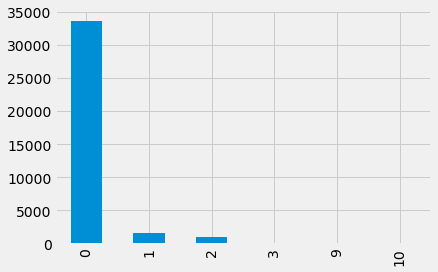

In [9]:
df.no_of_children.value_counts().plot(kind='bar')

<AxesSubplot:>

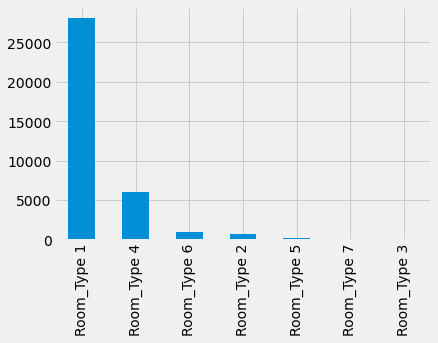

In [10]:
df.room_type_reserved.value_counts().plot(kind='bar')

<AxesSubplot:>

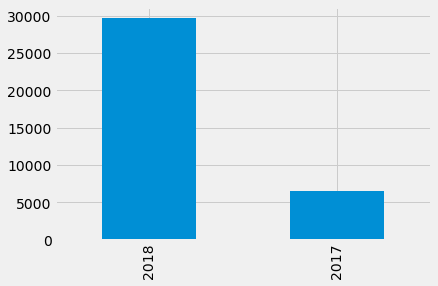

In [11]:
df.arrival_year.value_counts().plot(kind='bar')

<AxesSubplot:>

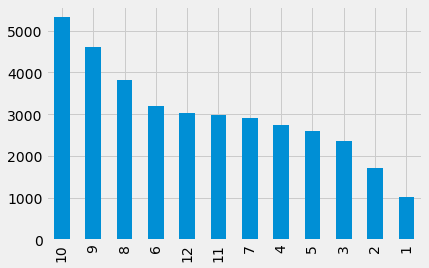

In [12]:
df.arrival_month.value_counts().plot(kind='bar')

<AxesSubplot:>

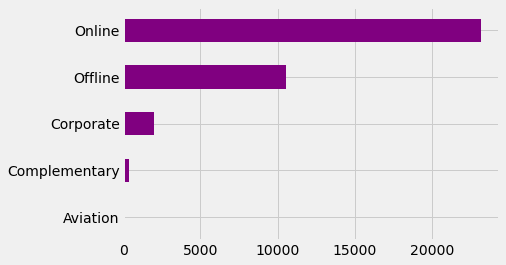

In [13]:
df.market_segment_type.value_counts().sort_values().plot(kind='barh', color = 'purple')


<AxesSubplot:>

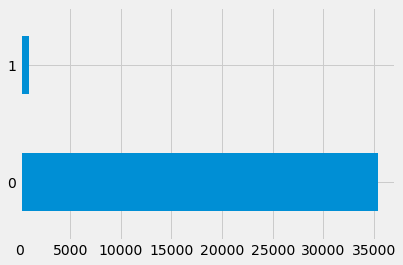

In [14]:

df.repeated_guest.value_counts().plot(kind='barh')

<AxesSubplot:>

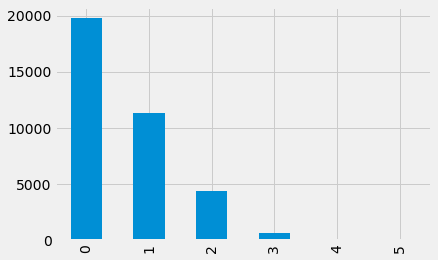

In [15]:
df.no_of_special_requests.value_counts().plot(kind='bar')

<AxesSubplot:>

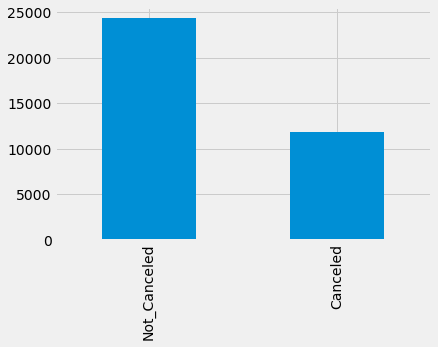

In [16]:
df.booking_status.value_counts().plot(kind='bar')

<AxesSubplot:>

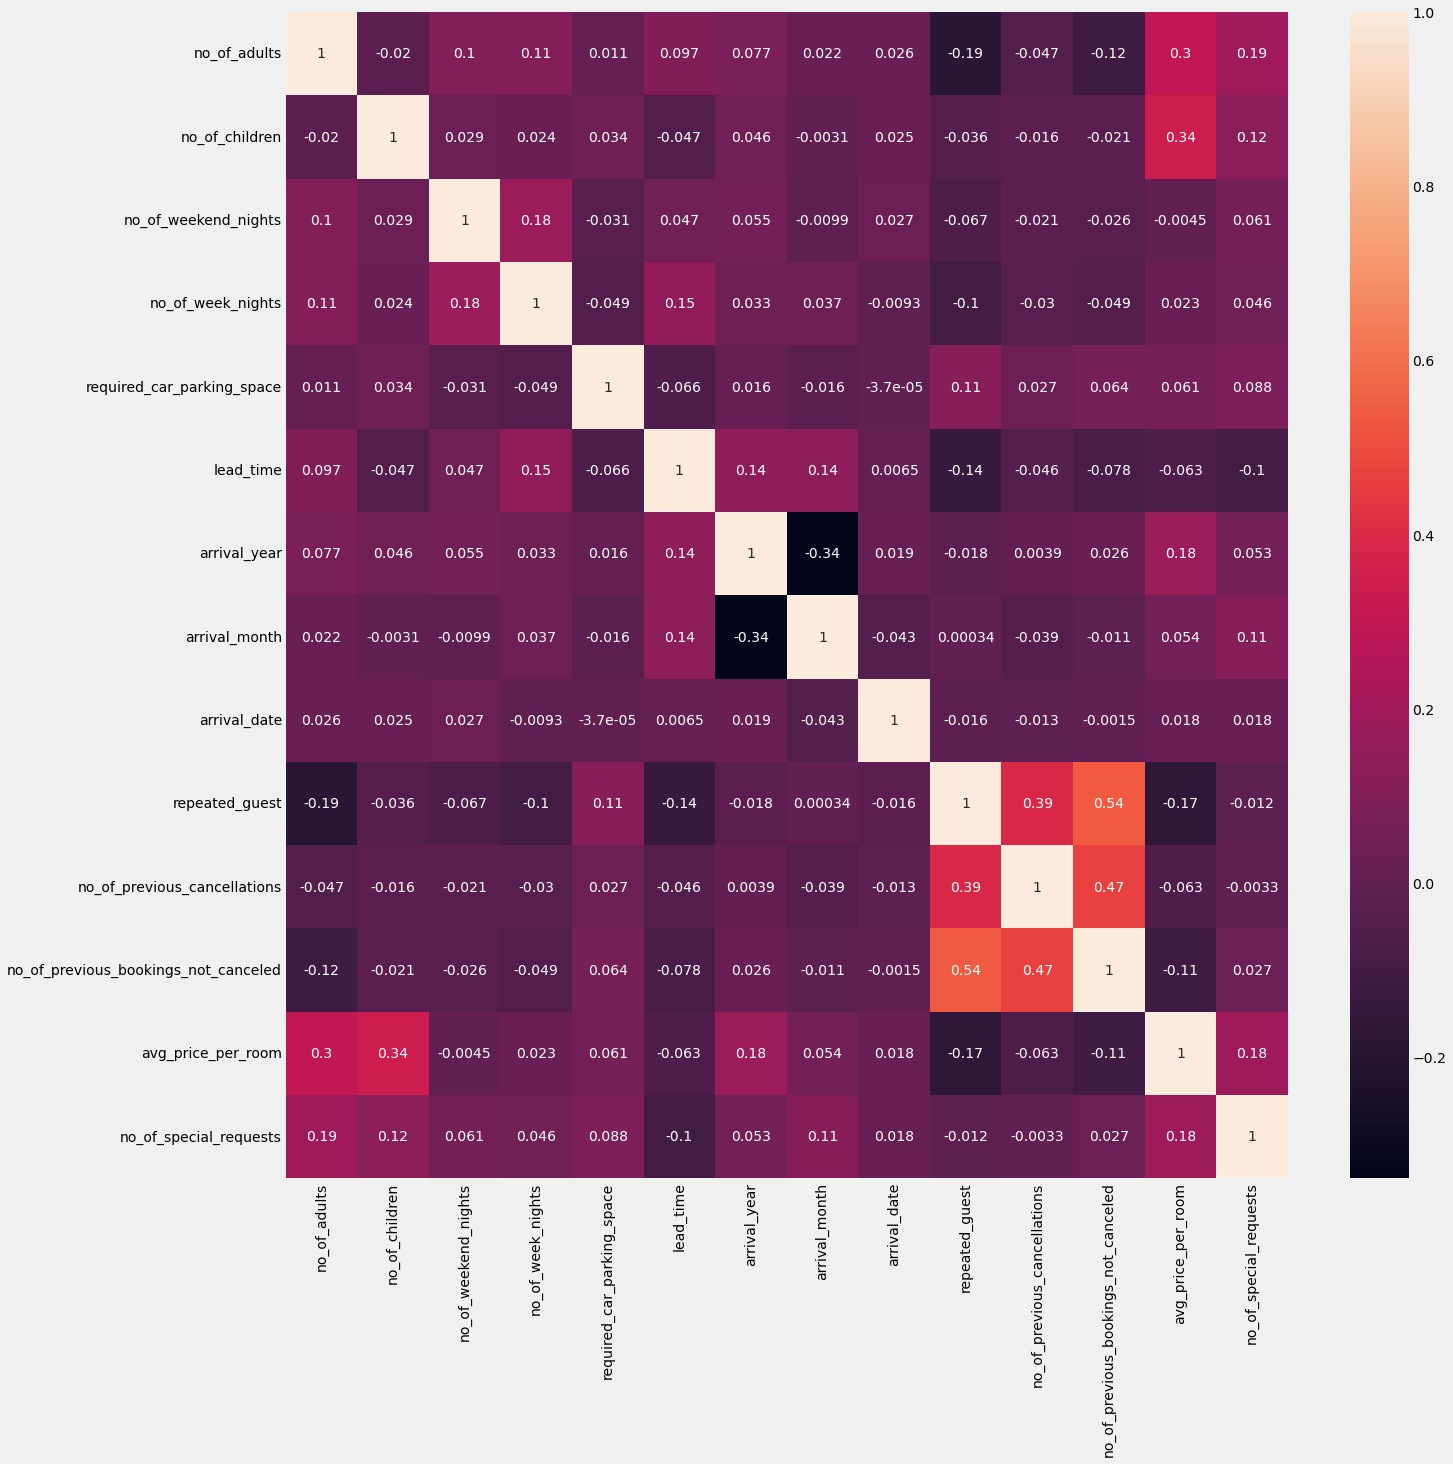

In [17]:
df_corr  = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot = True)

In [18]:
## Label encoding
df.booking_status=  df.booking_status.replace({'Canceled':0, "Not_Canceled":1})

<AxesSubplot:ylabel='features'>

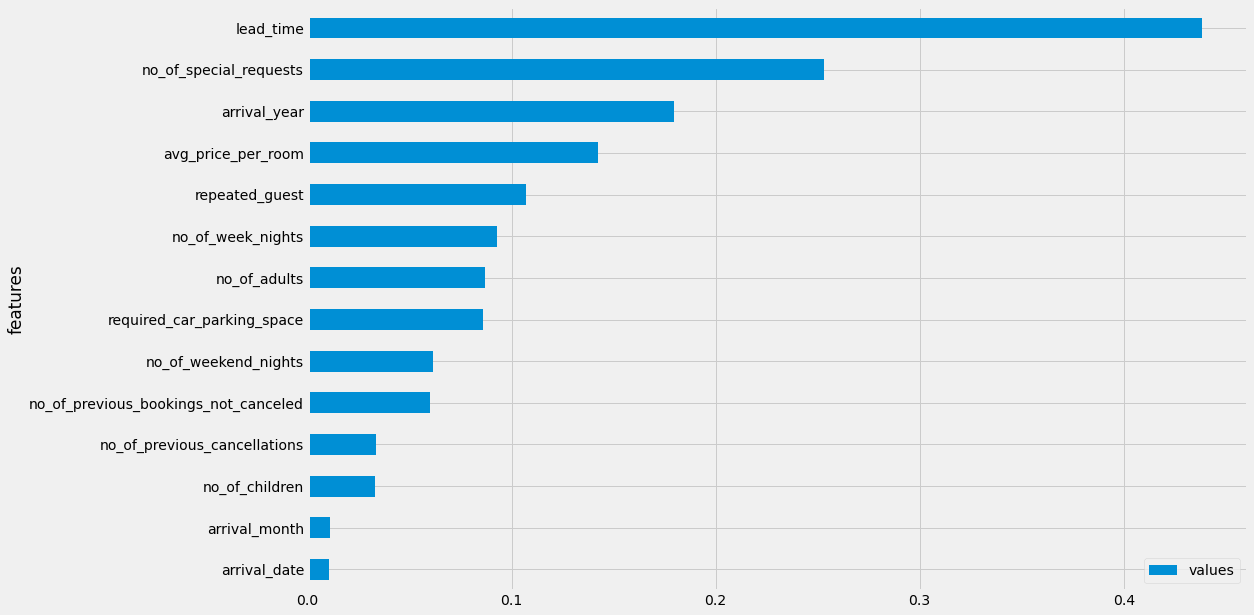

In [19]:
df_corr = df.corr()
df_corr.booking_status.sort_values()[:-1]
results = {}
for k, v in df_corr.booking_status.sort_values()[:-1].items():
    
    results[k] =abs(v)
    
# Sort the dictionary by value in descending order
sorted_d = dict(sorted(results.items(), key=lambda item: item[1], reverse=False))
results  = pd.DataFrame({'features':sorted_d.keys(), 'values':sorted_d.values()})
results

# Plot the features importance 
results.plot(x = "features", y="values", kind="barh", figsize = (15,10))



In [20]:

## categorical data:
cat_df = df.loc[:, ~df.columns.isin(['avg_price_per_room', 'lead_time'])]

cat_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status'],
      dtype='object')

In [21]:
## numerical data:
num_df = df[['avg_price_per_room', 'lead_time']]

## Initiating the Classifier and Evaluating the Model's Performance

In this part we would use different models (linear and non-linear model) to predict the cancellations 

In [22]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from xgboost import XGBClassifier
import operator
np.random.seed(101)

"""
for this problem statement, I've selected  Linear Models,
Non-linear Models and Models form Ensemble Methods  """

## Splitting the data into features and label
X=  df.drop(columns='booking_status')
y = df.booking_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## define the models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}


Skfold = StratifiedKFold(n_splits = 10)
metrics = ['accuracy']


## define the column to transform
numeric_features = ['avg_price_per_room', 'lead_time']
numeric_transformer = Pipeline(
                                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())])

categorical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
                        'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
                        'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
                        'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
                                              ("num", numeric_transformer, numeric_features),
                                              ("cat", categorical_transformer, categorical_features)],
                                              remainder='passthrough')

score ={}
def mod(models):
  for name,model in models.items():
    pipeline = Pipeline(steps=[('processor',preprocessor),('model', model)])
    pipeline.fit(X, y)
    score[name] = np.round(cross_val_score(estimator= pipeline,
                                          X= X_train,y= y_train, cv= Skfold, scoring = 'accuracy').mean(),4)
  best = max(score.items(), key=operator.itemgetter(1))[0]
  print(f'Best Estimator : {best} with score = {100*score[best]:.2f}')
          
  return score

results = mod(models)
results

Best Estimator : RandomForestClassifier with score = 89.36


{'LogisticRegression': 0.8118,
 'RandomForestClassifier': 0.8936,
 'GradientBoostingClassifier': 0.8497,
 'XGBClassifier': 0.8898}

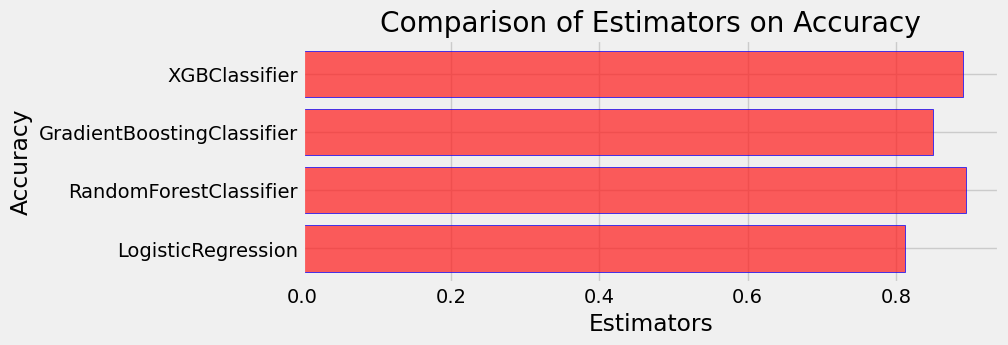

In [23]:
# compare algorithms
estimators = list(results.keys())
score = list(results.values())

fig =  plt.figure(figsize= (8,3), dpi = 100)
plt.barh(range(len(results)), score, tick_label = estimators,
        color=(1, 0.1, 0.1, 0.7),  edgecolor='blue')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Comparison of Estimators on Accuracy');

## Choosing the best performed models 

### XGBoostClassifier and RandomForestClassifier 


In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
params = {'model__eta': [0.05], 'model__max_depth': [6], 'model__n_estimators': [600]}
pipeline = Pipeline(steps=[('processor',preprocessor),('model', xgb)])
grid_xgb = GridSearchCV(pipeline, param_grid=params, cv = Skfold, n_jobs=-1)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['avg_price_per_room',
                                                                          'lead_time']),
                                                                        ('cat',
    

In [25]:
grid_xgb.best_params_   ## {'model__eta': 0.05, 'model__max_depth': 6, 'model__n_estimators': 600}

{'model__eta': 0.05, 'model__max_depth': 6, 'model__n_estimators': 600}

In [26]:
predictions_xgb = grid_xgb.predict(X_test)
confusion_matrix(y_test, predictions_xgb)

array([[2829,  737],
       [ 431, 6886]])

In [27]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3566
           1       0.90      0.94      0.92      7317

    accuracy                           0.89     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



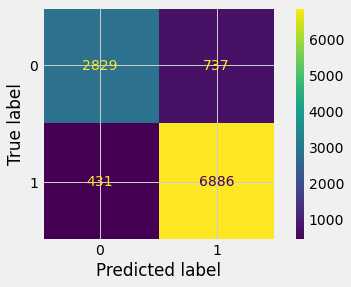

In [28]:
ConfusionMatrixDisplay.from_estimator(estimator = grid_xgb, X = X_test, y = y_test);

In [29]:
rfc = RandomForestClassifier()
params = {
    'model__n_estimators': [200],
    'model__max_features': [.7],
    'model__bootstrap': [ True],
    'model__max_depth':[6]
}
pipeline = Pipeline(steps=[('processor',preprocessor),('model', rfc)])
grid_rf = GridSearchCV(pipeline, param_grid=params, cv = Skfold, n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['avg_price_per_room',
                                                                          'lead_time']),
                                                                        ('cat',
    

In [30]:
grid_rf.best_params_ 

{'model__bootstrap': True,
 'model__max_depth': 6,
 'model__max_features': 0.7,
 'model__n_estimators': 200}

In [31]:
predictions_rf = grid_rf.predict(X_test)
confusion_matrix(y_test, predictions_rf)

array([[2581,  985],
       [ 560, 6757]])

In [32]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3566
           1       0.87      0.92      0.90      7317

    accuracy                           0.86     10883
   macro avg       0.85      0.82      0.83     10883
weighted avg       0.86      0.86      0.86     10883



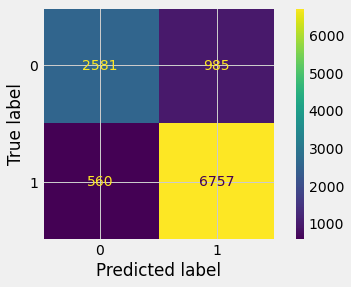

In [33]:
ConfusionMatrixDisplay.from_estimator(estimator = grid_rf, X = X_test, y = y_test);